In [39]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [40]:
#export
import torch, pdb, numpy as np, matplotlib.pyplot as plt, torch.nn as nn, random, os
from pathlib import Path
from collections import OrderedDict
import os

### Dataloader

In [41]:
#export
from torch.utils.data import Dataset, DataLoader
from scipy.ndimage import gaussian_filter, affine_transform
from PIL import Image
from torchvision.transforms import Normalize, RandomAffine, RandomHorizontalFlip, CenterCrop, ToTensor, Compose
from data import ImagenetVidDatatset

In [32]:
# data_meta_dir="./datasets/meta/"
# with np.load(os.path.join(data_meta_dir, 'imagenet.npz'), allow_pickle=True) as data:
#     trn_list = data['trn_lst']
#     trn_lb = data['trn_lb']
#     val_list = data['val_lst']
#     val_lb = data['val_lb']

In [33]:
# np.save(os.path.join(data_meta_dir, 'train.npy'), trn_list)
# np.save(os.path.join(data_meta_dir, 'valid.npy'), val_list)

In [34]:
# imgdims = (255, 255, 3)
# patchdims = (63, 63, 3)
# outputdims = (64, 64, 1)

In [35]:
# #export
# IMAGENET_VID_DIMS = dict(
#     image = (255, 255, 3),
#     patch = (63, 63, 3),
#     output = (64, 64, 1))

# DATA_MAP = {'a': 'ILSVRC2015_VID_train_0000',
#             'b': 'ILSVRC2015_VID_train_0001', 
#             'c': 'ILSVRC2015_VID_train_0002',
#             'd': 'ILSVRC2015_VID_train_0003',
#             'e': 'val'}

# DATA_ROOT = "/media/cwei/WD_BLACK/datasets/ILSVRC2015_crops/"

# IMAGENET_STATS = dict(mean = (0.485, 0.456, 0.406), 
#                       std = (0.229, 0.224, 0.225))

In [36]:
# #export
# generic_transforms = [ToTensor(), Normalize(**IMAGENET_STATS, inplace=True), ]
# patch_transforms = [RandomAffine(degrees=(8, 20), translate=[0.1, 0.1], scale=[0.95, 1.05]),
#                     RandomHorizontalFlip(0.5),
#                     CenterCrop(IMAGENET_VID_DIMS['patch'][:2]), 
#                     ]
# patch_tfms = Compose(patch_transforms + generic_transforms)
# generic_tfms = Compose(generic_transforms)

In [23]:
#export
# class ImagenetVidDatatset(Dataset):
#     def __init__(self, data_root=DATA_ROOT, data_meta_dir='../imagenet_vid/', mode='train',
#                  dims=IMAGENET_VID_DIMS, p_match=0.5, patch_augment=True, imagenet_norm=True):
#         self.root = data_root
#         self.dims = dims
#         self.p_match = p_match
#         self.patch_augment = patch_augment
#         assert mode in ['train', 'valid']
#         self.data = np.load(Path(data_meta_dir) / f'{mode}.npy', allow_pickle=True)

#         positive = np.zeros(self.dims['output'])
#         positive[self.dims['output'][0] // 2, self.dims['output'][1] // 2, 0] = 1
#         positive[:, :, 0] = 100 * gaussian_filter(positive[:, :, 0], sigma=(2, 2), mode='constant')
#         self.output = np.concatenate((positive, np.zeros(self.dims['output'])), -1)
#         self.tfms = generic_tfms
#         self.patch_tfms = patch_tfms if self.patch_augment else generic_tfms
#         self.imagenet_norm= imagenet_norm

#     def __len__(self):
        
#         return len(self.data)

#     def __getitem__(self, index):
#         input_obj = np.random.choice(self.data[index])
#         _video_dir, object_id, frames = Path(input_obj[0]), input_obj[1], input_obj[2]
#         video_dir = Path(self.root) / DATA_MAP[str(_video_dir.parent)] / _video_dir.name

#         if np.random.rand() < self.p_match:
#             # positive pair
#             patch_obj = input_obj
#             _patch_dir, patch_object_id, patch_frames = Path(input_obj[0]), input_obj[1], input_obj[2]
            
#             # choose two frames at most 100 frames apart
#             start_frame = np.random.randint(max(1, len(frames) - 100))
#             frame_in, frame_ex = np.random.choice(frames[start_frame : start_frame + 100], 2)
#             output_map = self.output[:, :, 0]
#             match = True
#         else:
#             # negative pair
#             new_index = np.random.choice(list(set(np.arange(len(self.data))) - set([index])))
#             patch_obj = np.random.choice(self.data[new_index])
#             _patch_dir, patch_object_id, patch_frames = Path(patch_obj[0]), patch_obj[1], patch_obj[2]
                                                         
#             frame_in = np.random.choice(frames)
#             frame_ex = np.random.choice(patch_frames)
#             output_map = self.output[:, :, 1]
#             match = False

#         input_fn = video_dir / f'{frame_in:06}.{object_id:02}.x.jpg'
#         patch_dir = Path(self.root) / DATA_MAP[str(_patch_dir.parent)] / _patch_dir.name
#         patch_fn = patch_dir / f"{frame_ex:06}.{patch_object_id:02}.{'x' if self.patch_augment else 'z'}.jpg"

#         img_input = Image.open(input_fn)
#         img_patch = Image.open(patch_fn)

#         if self.imagenet_norm:
#             img_input = self.tfms(img_input)
#             img_patch = self.patch_tfms(img_patch)

#         output = {'search_img': img_input,
#                   'patch_img': img_patch,
#                   'output_map': output_map,
#                   'match': np.float(match)}

#         return output



In [42]:
ds = ImagenetVidDatatset(data_meta_dir="./datasets/meta/", mode="train")

In [63]:
out = ds[0]

tensor(True)


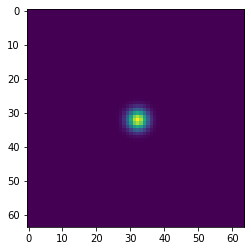

In [64]:
# plt.imshow(out['output_map'])
print(out["match"].bool())
plt.imshow(out['output_map'].squeeze(axis=0))

tensor(False)


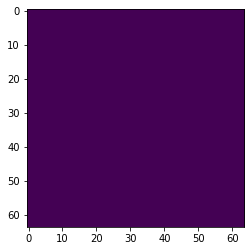

In [65]:
out = ds[0]
print(out["match"].bool())
plt.imshow(out['output_map'].squeeze(axis=0))

In [ ]:
# !git commit -m "update"

In [ ]:
# !git push --set-upstream origin vgg-counting

### Model Architecture

In [ ]:
from torchvision.models import resnet50
#from torchvision.models.resnet import Bottleneck

In [ ]:
res50 = resnet50(pretrained=True)

In [ ]:
#export
class Bottleneck(nn.Module):
    
    def __init__(self, inplanes, chans, kernel_size=3, stride=1,  expansion=4, downsample=False):
        super(Bottleneck, self).__init__()
        planes = [chans, chans, chans * expansion]
        self.conv1 = nn.Conv2d(inplanes, planes[0], kernel_size=1, stride=stride, bias=False)
        self.bn1 = nn.BatchNorm2d(planes[0])
        self.adapt = nn.Conv2d(planes[0], planes[1], kernel_size=1)
        self.conv2 = nn.Conv2d(planes[0], planes[1], kernel_size=kernel_size, padding=(kernel_size-1)//2, bias=False)
        self.bn2 = nn.BatchNorm2d(planes[1])
        self.conv3 = nn.Conv2d(planes[1], planes[2], kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes[2])
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.expansion = expansion
        
        # orthogonal initialization for adapt module
        for m in self.adapt.modules():
            if isinstance(m, nn.Conv2d):
                #print(m.weight.shape, m.weight.ndimension())
                nn.init.orthogonal_(m.weight, gain=0.1)
        
        if downsample:
            self.downsample = nn.Sequential(nn.Conv2d(inplanes, planes[-1], kernel_size=1, stride=stride, bias=False),
                                          nn.BatchNorm2d(planes[-1]))
                
    def forward(self, x):
        residual = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        adapt = self.adapt(out)
        out = self.conv2(out)
        
        out += adapt
        out = self.bn2(out)
        out = self.relu(out)
        out = self.conv3(out)
        out = self.bn3(out)
        
        if self.downsample:
            residual = self.downsample(residual)
        out += residual
        out = self.relu(out)
        
        return out
        
        

In [ ]:
#export
class ResNet50_Half(nn.Module):
    def __init__(self, in_chans=3, layers=[3, 4], chans=[64, 128], strides=[1, 2], expansion=4):
        super(ResNet50_Half, self).__init__()
        self.block = Bottleneck
        self.conv1 = nn.Conv2d(in_chans, chans[0], kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(chans[0])
        self.relu = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool2d(3, stride=2, padding=1)
        self.inplanes = chans[0]
        self.expansion = expansion
        
        self.layer1 = self._make_layer(layers[0], chans[0], chans[0], stride=strides[0])
        self.layer2 = self._make_layer(layers[1], self.inplanes, chans[1], stride=strides[1])
        
    def _make_layer(self, nblocks, in_planes, planes, stride=1, prefix=''):
        layers = [self.block(in_planes, planes, stride=stride, downsample=True)]
        self.inplanes = planes * self.expansion
        layers += [self.block(self.inplanes, planes) for b in range(nblocks - 1)]
        
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        
        return x
        

In [ ]:
base_encoder = ResNet50_Half()

In [ ]:
x = torch.rand(1, 3, 255,255)
out = base_encoder(x)
out.shape

In [ ]:
out

In [ ]:
base_encoder.load_state_dict(res50.state_dict(), strict=False)

In [ ]:
#export
def conv_block(nfin, nfout, ks, stride=1, padding=0, bias=False, bn=True, act_fn=None, convT=False, **kwargs):
    """
    Convolutional block with optional batch normalization and relu
    """
    _conv_block_list = [nn.Conv2d(nfin, nfout, ks, stride, padding=padding, bias=bias)]
    if convT:
        _conv_block_list = [nn.ConvTranspose2d(nfin, nfout, ks, stride, padding=padding, bias=bias, **kwargs)]

    if bn:
        _conv_block_list += [nn.BatchNorm2d(nfout)]

    if act_fn == 'relu':
        _conv_block_list += [nn.ReLU(inplace=True)]

    return nn.Sequential(*_conv_block_list)

In [ ]:
#export
class Relation_Module(nn.Module):
    """
    Relation module.
    """
    def __init__(self, in_planes, out_planes=256):
        super(Relation_Module, self).__init__()

        self.conv1 = conv_block(in_planes, out_planes, ks=3, padding=1, act_fn='relu')
        self.convT = conv_block(out_planes, out_planes, ks=3, stride=2, padding=1, convT=True, output_padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.convT(x)
        
        return x

In [ ]:
x = torch.rand(1, 1024, 32, 32)
module = Relation_Module(1024)
out = module(x)
out.shape

In [ ]:
#export
class L2_Normalization(nn.Module):
    """
    L2 normalization layer with learnable parameter.
    """
    def __init__(self, scale=True, eps=1e-6):
        super(L2_Normalization, self).__init__()
        self.eps = eps
        self.scale = scale
        self.alpha = 1 
        
        if self.scale:
            self.alpha = nn.Parameter(torch.ones(1))
            nn.init.uniform_(self.alpha, 10., 20.)
        
    def __repr__(self):
        return self.__class__.__name__ + f'(eps={self.eps}, alpha={self.alpha.data.tolist()[0]:.04f})'
    
    def forward(self, x):
        
        l2_norm = x / (torch.norm(x, p=2, dim=1, keepdim=True) + self.eps).expand_as(x)
        l2_norm = self.alpha * l2_norm
        
        return l2_norm

In [ ]:
alpha = nn.Parameter(torch.ones(1))
nn.init.uniform_(alpha, 10., 20.)
alpha

In [ ]:
l2 = L2_Normalization()
out = l2(x)
out.shape

In [ ]:
l2

In [ ]:
#export
config = OrderedDict(
            encoder=OrderedDict(
                            in_chans=3, 
                            layers=[3, 4], 
                            chans=[64, 128], 
                            strides=[1, 2], 
                            expansion=4),
            relation=dict(planes=256),
            l2norm=dict(scale=True)
)

In [ ]:
#export
class Generic_Matching_Net(nn.Module):
    """
    Generic Matching Network from Lu et al 2018
    Clas Agnostic Counting.
    """
    def __init__(self, config, pretrained=True):
        super(Generic_Matching_Net, self).__init__()
        self.encoder_patch = ResNet50_Half()
        self.encoder_image = ResNet50_Half()
        
        if pretrained:
            print('Loading imagenet weights.')
            from torchvision.models import resnet50
            res50 = resnet50(pretrained=True)
            self.encoder_patch.load_state_dict(res50.state_dict(), strict=False)
            self.encoder_image.load_state_dict(res50.state_dict(), strict=False)
            
        self.encoder_patch = nn.Sequential(self.encoder_patch, nn.AdaptiveAvgPool2d(1))
        self.l2_norm1 = L2_Normalization(config['l2norm']['scale'])
        self.l2_norm2 = L2_Normalization(config['l2norm']['scale'])
        in_planes = config['encoder']['chans'][-1] * config['encoder']['expansion'] * 2
        self.matching = Relation_Module(in_planes, config['relation']['planes'])
        self.prediction = conv_block(config['relation']['planes'], 1, ks=3, padding=1, bn=False, act_fn='relu')
        
    def forward(self, image, exemplar):
        F_image = self.l2_norm1(self.encoder_image(image))
        F_exemplar = self.l2_norm2(self.encoder_patch(exemplar))
        F_exemplar = F_exemplar.expand_as(F_image).clone()
        F = torch.cat((F_image, F_exemplar), dim=1)
        
        out = self.matching(F)
        out = self.prediction(out)
        
        return out
        

In [ ]:
model = Generic_Matching_Net(config)

In [ ]:
img, exp = torch.rand(1, 3, 255,255), torch.rand(1, 3, 63,63)
out = model(img, exp)
out.shape

In [ ]:
!python -m notebook2script class_agnostic_counting_playground.ipynb

In [ ]:
!git status

In [ ]:
!git commit -m "code refactoring and conversion to scripts."

In [ ]:
!git push

In [24]:
from catalyst.dl import SupervisedRunner

In [25]:
??SupervisedRunner

In [26]:
??isinstance

### Bagnet version

In [ ]:
import math
class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, kernel_size=1, expansion=4):
        super(Bottleneck, self).__init__()
        # print('Creating bottleneck with kernel size {} and stride {} with padding {}'.format(kernel_size, stride, (kernel_size - 1) // 2))
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=kernel_size, stride=stride, padding=0, bias=False) # changed padding from (kernel_size - 1) // 2
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride
        self.expansion = expansion

    def forward(self, x, **kwargs):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)
        
        if residual.size(-1) != out.size(-1):
            diff = residual.size(-1) - out.size(-1)
            residual = residual[:,:,:-diff,:-diff]
        
        out += residual
        out = self.relu(out)

        return out


class BagNet(nn.Module):

    def __init__(self, block, layers, in_chans=3, strides=[1, 2, 2, 2], chans=[64, 128, 256, 512], dropouts=[0, 0], 
                 kernel3=[0, 0, 0, 0], expansion=4, num_classes=1000, avg_pool=True):
        self.inplanes = chans[0]
        super(BagNet, self).__init__()
        self.conv1 = nn.Conv2d(in_chans, chans[0], kernel_size=1, stride=1, padding=0, bias=False)
        self.conv2 = nn.Conv2d(chans[0], chans[0], kernel_size=3, stride=1, padding=0, bias=False)
        self.bn1 = nn.BatchNorm2d(chans[0], momentum=0.001)
        self.relu = nn.ReLU(inplace=True)
        self.expansion = expansion
        self.layer1 = self._make_layer(block, chans[0], layers[0], stride=strides[0], kernel3=kernel3[0], prefix='layer1')
        self.layer2 = self._make_layer(block, chans[1], layers[1], stride=strides[1], kernel3=kernel3[1], prefix='layer2')
        #self.layer3 = self._make_layer(block, chans[2], layers[2], stride=strides[2], kernel3=kernel3[2], prefix='layer3')
        #self.layer4 = self._make_layer(block, chans[3], layers[3], stride=strides[3], kernel3=kernel3[3], prefix='layer4')
        
        self.dropout1 = nn.Dropout(dropouts[0])
        self.dropout2 = nn.Dropout(dropouts[1])
        self.num_classes = num_classes
        if self.num_classes:
            self.avgpool = nn.AvgPool2d(1, stride=1)
            self.fc = nn.Linear(chans[3] * self.expansion, num_classes)
            self.avg_pool = avg_pool

        self.block = block

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def _make_layer(self, block, planes, blocks, stride=1, kernel3=0, prefix=''):
        downsample = None
        if stride != 1 or self.inplanes != planes * self.expansion:
            downsample = nn.Sequential(nn.Conv2d(self.inplanes, planes * self.expansion,
                                       kernel_size=1, stride=stride, bias=False),
                                       nn.BatchNorm2d(planes * self.expansion))

        layers = []
        kernel = 1 if kernel3 == 0 else 3
        layers.append(block(self.inplanes, planes, stride, downsample, kernel_size=kernel, expansion=self.expansion))
        self.inplanes = planes * self.expansion
        for i in range(1, blocks):
            kernel = 1 if kernel3 <= i else 3
            layers.append(block(self.inplanes, planes, kernel_size=kernel, expansion=self.expansion))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.dropout1(self.layer1(x))
        x = self.dropout1(self.layer2(x))
    

        return x

In [ ]:
strides=[1, 2,]# 2, 1]
model2 = BagNet(Bottleneck, [3, 4, ], strides=strides, kernel3=[3, 4, ], num_classes=None)

In [ ]:
model2

In [ ]:
out = model2(x)
out.shape

In [ ]:
%debug

In [ ]:
adapt = nn.Conv2d(3, 10, kernel_size=3, padding=(3-1)//2)
for m in adapt.modules():
    if isinstance(m, nn.Conv2d):
        print(m.weight.shape, m.weight.ndimension())
        nn.init.orthogonal_(m.weight, gain=0.1)
        

In [ ]:
x = torch.rand(1, 3, 25,25)
adapt(x).shape

In [ ]:
class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, kernel_size=1, expansion=4):
        super(Bottleneck, self).__init__()
        # print('Creating bottleneck with kernel size {} and stride {} with padding {}'.format(kernel_size, stride, (kernel_size - 1) // 2))
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=kernel_size, stride=stride, padding=0, bias=False) # changed padding from (kernel_size - 1) // 2
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride
        self.expansion = expansion

    def forward(self, x, **kwargs):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)
        
        if residual.size(-1) != out.size(-1):
            diff = residual.size(-1) - out.size(-1)
            residual = residual[:,:,:-diff,:-diff]
        
        out += residual
        out = self.relu(out)

        return out
